In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

df = pd.read_excel("EconomicIndicators2020.xlsx",sheet_name='MainDataSheet')

In [2]:
df

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,NaN,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,70.33,1759.31,11541.68,14968.15,115577.80,120.50,34.23
173,174,Vietnam,Asia,75.38,3586.35,83004.91,43865.60,355323.10,166.23,96.65
174,175,West Bank and Gaza,Asia,74.40,3233.57,1715.80,1103.00,NaN,NaN,4.80
175,176,Zambia,Africa,62.38,956.83,1397.30,539.17,7607.10,53.75,18.93


In [3]:
print(df.isna().sum())

No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64


In [4]:
avg_life_exp = df['LifeExpect'].mean()
print("The average life expectancy across all countries is:",avg_life_exp)

The average life expectancy across all countries is: 72.67039548022599


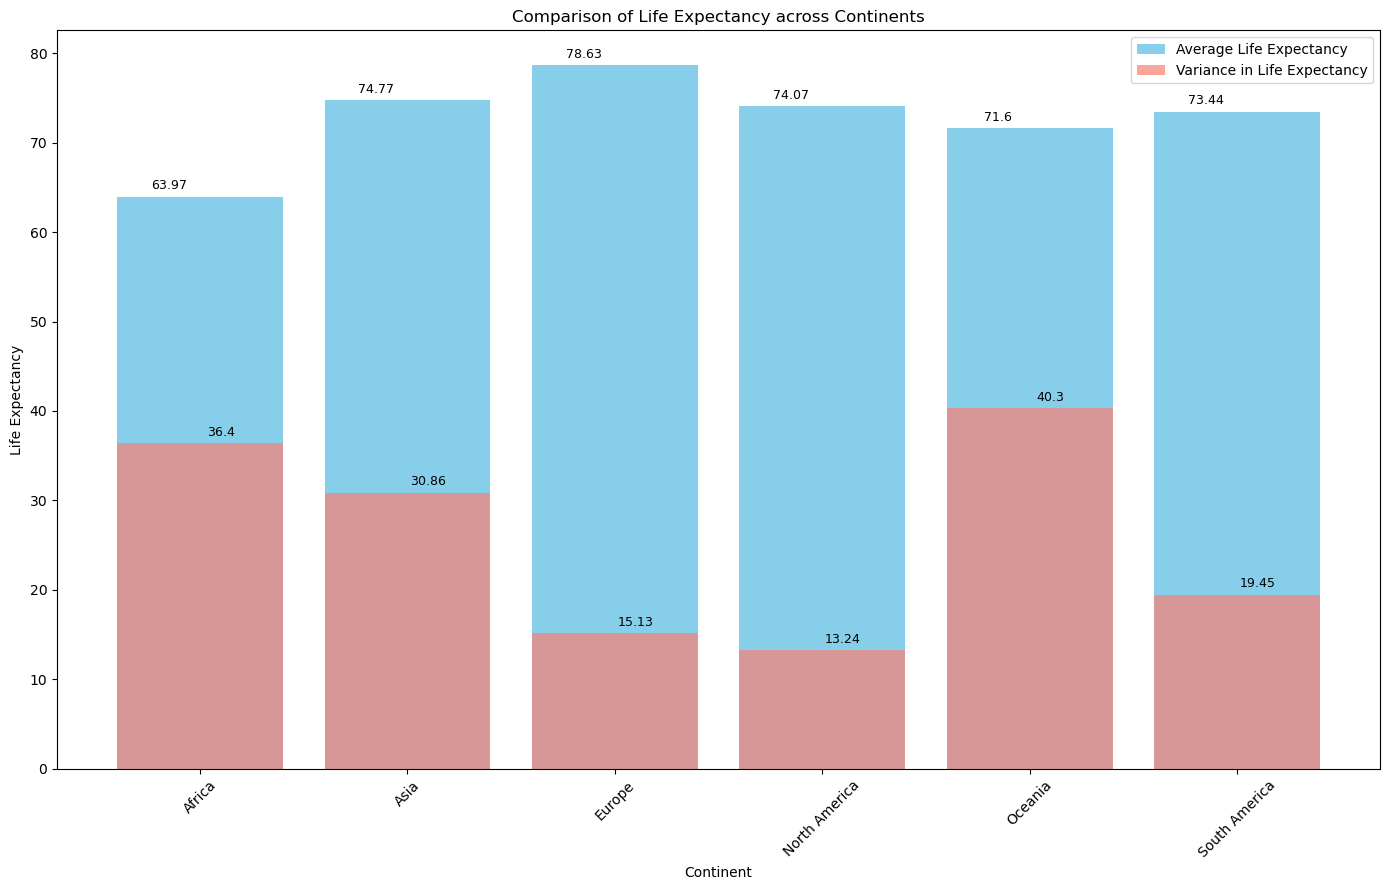

In [5]:
continent_avg = df.groupby('Continent')['LifeExpect'].mean()
continent_var = df.groupby('Continent')['LifeExpect'].var()

plt.figure(figsize=(14, 9))


plt.bar(continent_avg.index, continent_avg, color='skyblue', label='Average Life Expectancy')
plt.bar(continent_var.index, continent_var, color='salmon', alpha=0.7, label='Variance in Life Expectancy')


for i, v in enumerate(continent_avg):
    plt.text(i - 0.15, v + 0.5, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=9)
for i, v in enumerate(continent_var):
    plt.text(i + 0.1, v + 0.5, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=9)

plt.title('Comparison of Life Expectancy across Continents')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

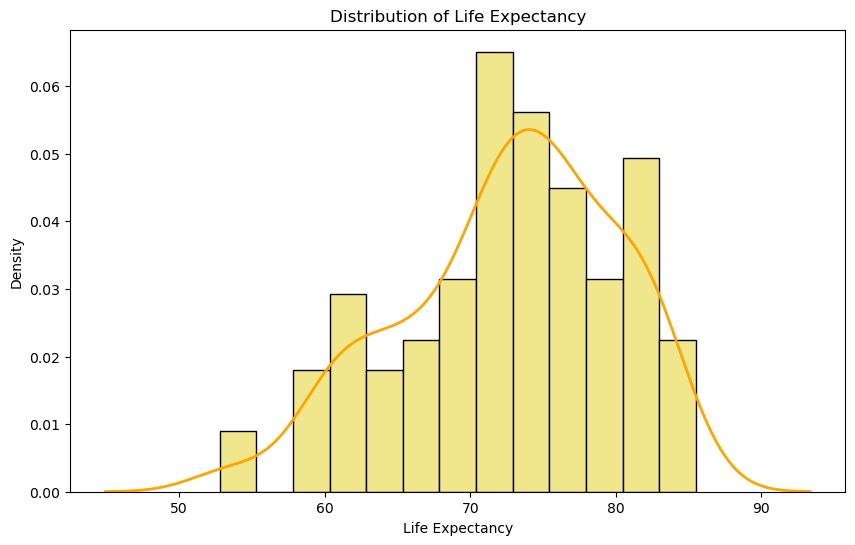

In [6]:
life_expectancy = df['LifeExpect']
plt.figure(figsize=(10, 6))


plt.hist(life_expectancy, bins=13, color='khaki', edgecolor='black', density=True)
sns.kdeplot(life_expectancy, color='orange', linestyle='-', linewidth=2)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Density')

plt.show()

In [7]:
df['LifeExpect'].describe()

count    177.000000
mean      72.670395
std        7.361974
min       52.780000
25%       67.990000
50%       73.650000
75%       78.080000
max       85.500000
Name: LifeExpect, dtype: float64

In [8]:
# hypothesis testing
#H0:平均壽命等於70歲
#Ha:平均壽命不等於70歲


expected_mean = 70  # H0
alpha = 0.01  # significant level

t_statistic, p_value = stats.ttest_1samp(df['LifeExpect'], expected_mean)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")



t-statistic: 4.825784830727795
p-value: 3.0106331354163777e-06


In [9]:
# result
if p_value < alpha:
    print("At a 99% confidence level, we reject the null hypothesis.")
else:
    print("At a 99% confidence level, we accept the null hypothesis.")

At a 99% confidence level, we reject the null hypothesis.


In [10]:
correlation = df[['LifeExpect', 'GDPPC']].corr()
print(correlation)

            LifeExpect     GDPPC
LifeExpect    1.000000  0.619943
GDPPC         0.619943  1.000000


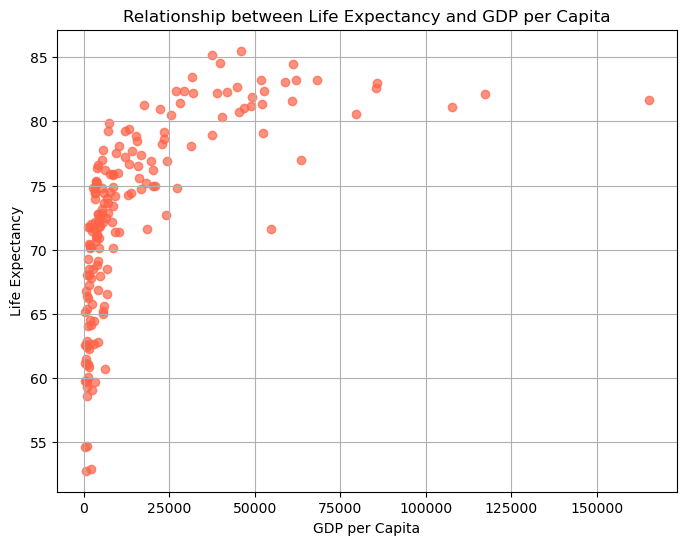

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDPPC'], df['LifeExpect'], alpha=0.7, color='tomato')
plt.title('Relationship between Life Expectancy and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [12]:
import scipy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [13]:
xvar_list = ['GDPPC']
yvar = 'LifeExpect'
X = df[xvar_list]
y = df[[yvar]]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           3.56e-20
Time:                        23:04:01   Log-Likelihood:                -561.07
No. Observations:                 177   AIC:                             1126.
Df Residuals:                     175   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5382      0.529    131.555      0.0

In [14]:
df['CO2kt'].fillna(df['CO2kt'].mean(), inplace=True)

In [15]:
df['HealthPC$'].fillna(df['HealthPC$'].mean(), inplace=True)

In [16]:
correlation = df[['LifeExpect', 'GDPPC','HealthPC$']].corr()
print(correlation)

            LifeExpect     GDPPC  HealthPC$
LifeExpect    1.000000  0.619943   0.597936
GDPPC         0.619943  1.000000   0.715271
HealthPC$     0.597936  0.715271   1.000000


In [17]:
print(df.isna().sum())

No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       177 non-null    float64
 8   HealthPC$   177 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB
None


In [19]:
xvar_list = ['GDPPC','MfgMn$','AgriMn$','CO2kt','HealthPC$','Pop_mn']
yvar = 'LifeExpect'

X = df[xvar_list]
y = df[[yvar]]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     23.13
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           7.23e-20
Time:                        23:04:01   Log-Likelihood:                -551.18
No. Observations:                 177   AIC:                             1116.
Df Residuals:                     170   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1624      0.540    128.130      0.0